In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

# Explicitly specifying the dtype
_empty_series = pd.Series(dtype=float)


ModuleNotFoundError: No module named 'yfinance'

In [2]:
start = '2015-01-01'
end = '2024-2-20'
stock = 'GOOG'

data = yf.download(stock, start, end)

NameError: name 'yf' is not defined

In [3]:
data.reset_index(inplace=True)

NameError: name 'data' is not defined

In [4]:
data

NameError: name 'data' is not defined

In [5]:
plt.plot(data.Close)

NameError: name 'data' is not defined

In [6]:
#MOVING AVERAGE
ma_100_days = data.Close.rolling(100).mean()
ma_100_days

NameError: name 'data' is not defined

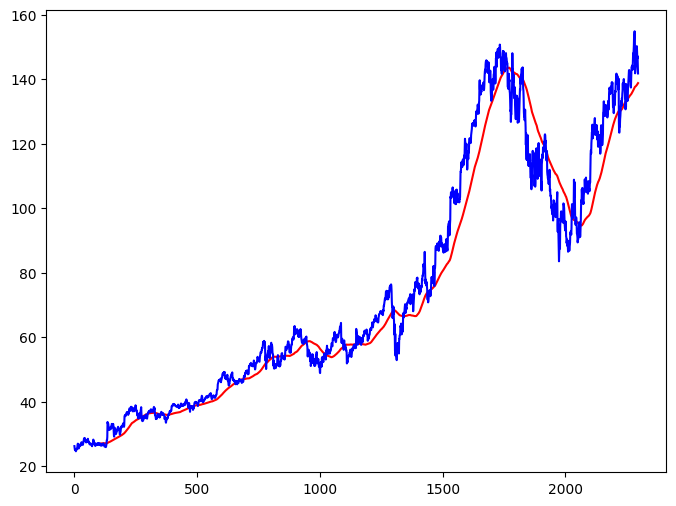

In [7]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'b')
plt.show()

In [8]:
ma_200_days = data.Close.rolling(200).mean()
ma_200_days

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2292    131.678875
2293    131.868875
2294    132.063475
2295    132.244625
2296    132.423525
Name: Close, Length: 2297, dtype: float64

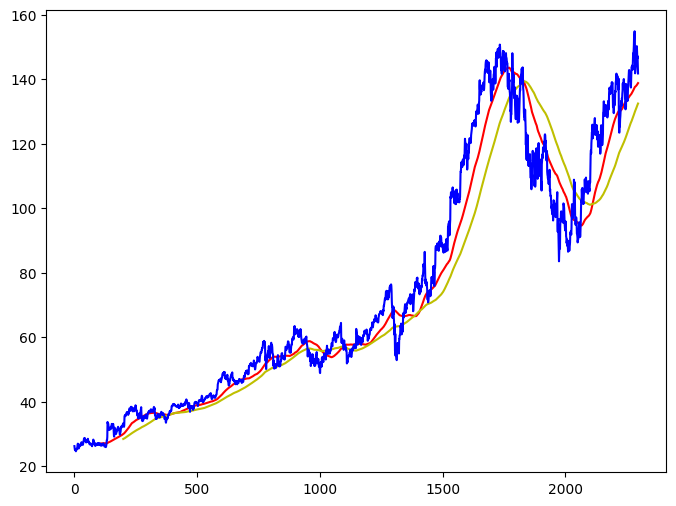

In [9]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'y')
plt.plot(data.Close,'b')
plt.show()

In [10]:
data.shape

(2297, 7)

In [11]:
data.dropna(inplace=True)

In [12]:
#splitting data into test and train

data_train = pd.DataFrame(data.Close[0: int(len(data)*0.70)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.70): len(data)])

print(data_train.shape)
print(data_test.shape)

(1607, 1)
(690, 1)


In [13]:
data_train.head()

,Close
0,26.168653
1,25.623152
2,25.029282
3,24.986401
4,25.065184


In [14]:
data_test.head()

,Close
1607,117.254997
1608,120.333504
1609,120.453499
1610,121.676498
1611,120.125504


In [15]:
data_train.shape[0]

1607

In [16]:
data_test.shape[0]

690

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [18]:
data_train_scale = scaler.fit_transform(data_train)
data_train_scale

array([[0.01659455],
       [0.01096702],
       [0.0048405 ],
       ...,
       [0.93477036],
       [0.93749385],
       [0.961933  ]])

In [19]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
x, y = np.array(x), np.array(y)  

In [20]:
x.shape

(1507, 100, 1)

In [21]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))
x.shape


(1507, 100, 1)

In [22]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [23]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
model.fit(x,y, epochs = 60, batch_size =32, verbose =1)

Epoch 1/60
48/48 [==============================] - 14s 188ms/step - loss: 0.0277
Epoch 2/60
48/48 [==============================] - 9s 181ms/step - loss: 0.0070
Epoch 3/60
48/48 [==============================] - 9s 178ms/step - loss: 0.0051
Epoch 4/60
48/48 [==============================] - 9s 180ms/step - loss: 0.0047
Epoch 5/60
48/48 [==============================] - 9s 185ms/step - loss: 0.0050
Epoch 6/60
48/48 [==============================] - 9s 185ms/step - loss: 0.0046
Epoch 7/60
48/48 [==============================] - 9s 182ms/step - loss: 0.0038
Epoch 8/60
48/48 [==============================] - 9s 188ms/step - loss: 0.0043
Epoch 9/60
48/48 [==============================] - 9s 186ms/step - loss: 0.0041
Epoch 10/60
48/48 [==============================] - 9s 187ms/step - loss: 0.0036
Epoch 11/60
48/48 [==============================] - 9s 187ms/step - loss: 0.0035
Epoch 12/60
48/48 [==============================] - 9s 196ms/step - loss: 0.0032
Epoch 13/60
48/48 [=====

In [28]:
pas_100_days = data_train.tail(100)

In [29]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [30]:
data_test.head()

,Close
0,88.804497
1,87.935997
2,86.975998
3,87.594002
4,86.412003


In [31]:
data_test_scale  =  scaler.fit_transform(data_test)
data_test_scale

array([[0.07448492],
       [0.06231253],
       [0.04885775],
       [0.05751933],
       [0.04095312],
       [0.04983882],
       [0.04589356],
       [0.08230561],
       [0.09629291],
       [0.06791872],
       [0.05378419],
       [0.05928526],
       [0.04932032],
       [0.04652423],
       [0.08483534],
       [0.1521374 ],
       [0.15518574],
       [0.16205326],
       [0.16089704],
       [0.17339877],
       [0.11281709],
       [0.13546608],
       [0.11628598],
       [0.16226348],
       [0.18059574],
       [0.28049761],
       [0.27510164],
       [0.30007013],
       [0.29650319],
       [0.28991593],
       [0.29823405],
       [0.29859152],
       [0.30435179],
       [0.31681855],
       [0.32131043],
       [0.31352492],
       [0.30227052],
       [0.27686063],
       [0.28105118],
       [0.29808692],
       [0.25337075],
       [0.25722502],
       [0.28851441],
       [0.28454103],
       [0.2501122 ],
       [0.26579539],
       [0.30745627],
       [0.248

In [32]:
data_test_scale.shape

(790, 1)

In [33]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [34]:
x = np.reshape(x, (x.shape[0],x.shape[1],1))

In [35]:
print(x.shape)
print(y.shape)

(690, 100, 1)
(690,)


In [36]:
#predictions
pred = model.predict(x)

22/22 [==============================] - 2s 66ms/step


In [37]:
pred.shape
pred

array([[0.44760883],
       [0.4466087 ],
       [0.44888276],
       [0.45445   ],
       [0.46303752],
       [0.47326493],
       [0.48383236],
       [0.49402457],
       [0.50319344],
       [0.51061434],
       [0.51676655],
       [0.52236754],
       [0.52808565],
       [0.53426385],
       [0.5413286 ],
       [0.54908174],
       [0.5572433 ],
       [0.56524897],
       [0.57242537],
       [0.5785742 ],
       [0.5833418 ],
       [0.58693707],
       [0.5898326 ],
       [0.59215814],
       [0.5942701 ],
       [0.5962592 ],
       [0.598047  ],
       [0.5992608 ],
       [0.5994657 ],
       [0.5989543 ],
       [0.5989735 ],
       [0.60066456],
       [0.6044782 ],
       [0.6097886 ],
       [0.6158674 ],
       [0.62238455],
       [0.6291266 ],
       [0.6361921 ],
       [0.64309597],
       [0.6495575 ],
       [0.6543462 ],
       [0.6575346 ],
       [0.6600367 ],
       [0.6627768 ],
       [0.66778666],
       [0.6764642 ],
       [0.6875674 ],
       [0.699

In [38]:
pred1=scaler.inverse_transform(pred)
pred1

array([[115.42689 ],
       [115.35553 ],
       [115.51778 ],
       [115.91501 ],
       [116.527725],
       [117.257454],
       [118.01144 ],
       [118.73865 ],
       [119.392845],
       [119.922325],
       [120.36129 ],
       [120.76092 ],
       [121.16891 ],
       [121.609726],
       [122.11379 ],
       [122.66698 ],
       [123.249306],
       [123.82051 ],
       [124.33255 ],
       [124.77126 ],
       [125.11143 ],
       [125.36796 ],
       [125.574554],
       [125.74048 ],
       [125.891174],
       [126.03309 ],
       [126.16065 ],
       [126.24725 ],
       [126.26188 ],
       [126.22539 ],
       [126.22676 ],
       [126.34741 ],
       [126.619514],
       [126.99841 ],
       [127.43214 ],
       [127.89713 ],
       [128.37817 ],
       [128.88231 ],
       [129.3749  ],
       [129.83592 ],
       [130.1776  ],
       [130.40509 ],
       [130.58362 ],
       [130.77913 ],
       [131.13657 ],
       [131.75572 ],
       [132.54793 ],
       [133.3

In [39]:
y

array([0.47323056, 0.51637711, 0.51805889, 0.53519974, 0.5134619 ,
       0.51980387, 0.53259291, 0.52661536, 0.51493346, 0.54797478,
       0.55801682, 0.56976181, 0.57575337, 0.59691668, 0.59154178,
       0.60072881, 0.59625789, 0.59154178, 0.60099517, 0.58973371,
       0.60217246, 0.60980378, 0.60226356, 0.61376315, 0.6097408 ,
       0.60728111, 0.59605472, 0.5862089 , 0.6009601 , 0.63390325,
       0.6486475 , 0.65294327, 0.64032243, 0.64589343, 0.65976172,
       0.66579551, 0.68104425, 0.66960754, 0.67772261, 0.64140155,
       0.66729509, 0.6883041 , 0.69850749, 0.76140151, 0.78702879,
       0.74711278, 0.74129648, 0.74352488, 0.72503148, 0.73580246,
       0.73987389, 0.73634908, 0.74912412, 0.7504695 , 0.76400844,
       0.76533286, 0.75962862, 0.76943937, 0.76967077, 0.77681855,
       0.75417673, 0.74393848, 0.74875264, 0.77010511, 0.80742125,
       0.82562722, 0.8333567 , 0.82176601, 0.85578851, 0.86866855,
       0.86856355, 0.87388926, 0.85114222, 0.85893479, 0.86936

In [40]:
scale =1/scaler.scale_
pred = pred*scale
y = y*scale

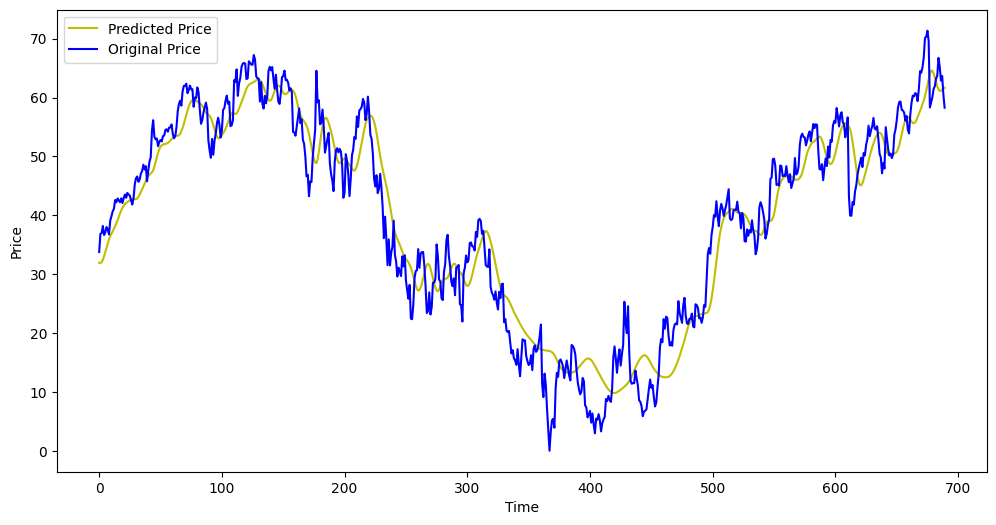

In [41]:
plt.figure(figsize=(12,6))
plt.plot(pred, 'y', label = 'Predicted Price')
plt.plot(y, 'b', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [42]:
#future stock Price

In [43]:
future_days = 30
predicted_prices = []

# Take the last 100 days from the training data as a starting point for prediction
last_100_days = data_test_scale[-100:].reshape(1, -1)

for i in range(future_days):
    # Reshape the last 100 days data for prediction
    input_data = last_100_days.reshape((1, 100, 1))
    # Predict the next day's price
    prediction = model.predict(input_data)
    # Append the prediction to the list
    predicted_prices.append(prediction[0,0])
    # Update the last_100_days array for the next iteration
    last_100_days = np.append(last_100_days[:,1:], prediction, axis=1)



1/1 [==============================] - 0s 45ms/step


In [44]:
predicted_prices = np.array(predicted_prices)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1,1))

In [45]:
predicted_prices

array([[145.05588],
       [144.83253],
       [144.55351],
       [144.27338],
       [144.0197 ],
       [143.80052],
       [143.613  ],
       [143.45023],
       [143.30504],
       [143.17162],
       [143.04602],
       [142.92577],
       [142.80936],
       [142.69594],
       [142.58492],
       [142.4759 ],
       [142.36864],
       [142.26277],
       [142.158  ],
       [142.05411],
       [141.95102],
       [141.84865],
       [141.7469 ],
       [141.64577],
       [141.54523],
       [141.44534],
       [141.34616],
       [141.24776],
       [141.15019],
       [141.05353]], dtype=float32)

In [46]:
model.save('Stock Predictions Model.keras')